#  Find the factors that affect the life expectancy. Specifically, need to find out which factors increase the expected life in the countries and which factors decrease it.

#### First, let's import and take a look at our data set:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'lifeexpectancy'
table_name = 'lifeexpectancy'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
        postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query('select * from lifeexpectancy', con=engine)
engine.dispose()

In [2]:
df.head(50)

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
5,Afghanistan,2010,Developing,58.8,279.0,74,0.01,79.679367,66.0,1989,...,66.0,9.20,66.0,0.1,553.328940,2883167.0,18.4,18.4,0.448,9.2
6,Afghanistan,2009,Developing,58.6,281.0,77,0.01,56.762217,63.0,2861,...,63.0,9.42,63.0,0.1,445.893298,284331.0,18.6,18.7,0.434,8.9
7,Afghanistan,2008,Developing,58.1,287.0,80,0.03,25.873925,64.0,1599,...,64.0,8.33,64.0,0.1,373.361116,2729431.0,18.8,18.9,0.433,8.7
8,Afghanistan,2007,Developing,57.5,295.0,82,0.02,10.910156,63.0,1141,...,63.0,6.73,63.0,0.1,369.835796,26616792.0,19.0,19.1,0.415,8.4
9,Afghanistan,2006,Developing,57.3,295.0,84,0.03,17.171518,64.0,1990,...,58.0,7.43,58.0,0.1,272.563770,2589345.0,19.2,19.3,0.405,8.1


In [3]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [4]:
# percentage of null values in each column
df.isnull().mean()*100

Country                             0.000000
Year                                0.000000
Status                              0.000000
Life expectancy                     0.340368
Adult Mortality                     0.340368
infant deaths                       0.000000
Alcohol                             6.603131
percentage expenditure              0.000000
Hepatitis B                        18.822328
Measles                             0.000000
 BMI                                1.157250
under-five deaths                   0.000000
Polio                               0.646698
Total expenditure                   7.692308
Diphtheria                          0.646698
 HIV/AIDS                           0.000000
GDP                                15.248468
Population                         22.191967
 thinness  1-19 years               1.157250
 thinness 5-9 years                 1.157250
Income composition of resources     5.684139
Schooling                           5.547992
dtype: flo

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [6]:
def clean_col(col):
    # remove leading & trailing whitespace
    col = col.strip()
    # make the string lowercase
    col = col.lower()
    # change doubled space into single space
    col = col.replace('  ', ' ')
    return col

new_columns = []
for c in df.columns:
    clean_c = clean_col(c)
    new_columns.append(clean_c)

df.columns = new_columns
print(df.columns)

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'gdp', 'population', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling'],
      dtype='object')


## Detect the problems with the data such as missing values and outliers. Are there any nonsense values that seem to be stemmed from the data collection? For the missing values, discuss which technique would be the most suitable one in filling out these values. Regarding the outliers, discuss their potential effects on your analysis and select an appropriate method to deal with them.

In [7]:
df[df['infant deaths'] > 1000]

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
1190,India,2012,Developing,67.3,19.0,1100,3.10,64.969645,73.0,18668,...,79.0,4.39,82.0,0.2,1446.985410,1.263659e+08,26.9,27.6,0.590,11.3
1191,India,2011,Developing,66.8,193.0,1100,3.00,64.605901,44.0,33634,...,79.0,4.33,82.0,0.2,1461.671957,1.247236e+08,26.9,27.7,0.580,10.8
1192,India,2010,Developing,66.4,196.0,1200,2.77,57.733599,38.0,31458,...,76.0,4.28,79.0,0.2,1345.771530,1.239869e+07,27.0,27.8,0.569,10.4
1193,India,2009,Developing,66.0,2.0,1300,2.50,0.844186,37.0,56188,...,73.0,4.38,74.0,0.2,19.317765,1.214271e+08,27.0,27.8,0.563,10.5
1194,India,2008,Developing,65.5,23.0,1300,1.93,43.030433,29.0,44258,...,69.0,4.34,7.0,0.3,991.484634,1.197147e+08,27.0,27.9,0.556,10.2
1195,India,2007,Developing,65.2,26.0,1400,1.59,5.234770,6.0,41144,...,67.0,4.23,64.0,0.3,118.166373,1.179681e+09,27.1,28.0,0.546,9.9
1196,India,2006,Developing,64.8,28.0,1500,1.37,34.859427,6.0,64185,...,66.0,4.25,65.0,0.3,792.259698,1.161978e+09,27.1,28.0,0.536,9.7
1197,India,2005,Developing,64.4,211.0,1500,1.27,3.509637,8.0,36711,...,65.0,4.28,65.0,0.3,77.819000,1.144119e+09,27.2,28.1,0.526,9.4
1198,India,2004,Developing,64.0,214.0,1600,1.20,27.338009,6.0,55443,...,58.0,4.22,63.0,0.3,621.318377,1.126136e+09,27.2,28.2,0.518,9.2
1199,India,2003,Developing,63.7,216.0,1700,1.19,19.480868,NaN,47147,...,57.0,4.30,61.0,0.3,541.135228,1.182785e+07,27.3,28.3,0.505,8.6


According to the data set's description, `infant deaths` variable indicates the number of infant deaths per 1000 population so it doesn't make sense that the numbers for India are higher than 1000.  

In [8]:
df.groupby('year').count()

,country,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
year,,,,,,,,,,,,,,,,,,,,,
2000,183,183,183,183,183,182,183,85,183,181,...,180,179,180,183,154,143,181,181,173,173
2001,183,183,183,183,183,182,183,95,183,181,...,180,179,180,183,155,143,181,181,173,173
2002,183,183,183,183,183,182,183,113,183,181,...,181,179,181,183,155,143,181,181,173,173
2003,183,183,183,183,183,182,183,131,183,181,...,181,180,181,183,155,143,181,181,173,173
2004,183,183,183,183,183,182,183,138,183,181,...,181,180,181,183,156,143,181,181,173,173
2005,183,183,183,183,183,181,183,147,183,181,...,181,180,181,183,156,143,181,181,173,173
2006,183,183,183,183,183,182,183,151,183,181,...,182,180,182,183,156,143,181,181,173,173
2007,183,183,183,183,183,182,183,159,183,181,...,182,180,182,183,156,143,181,181,173,173
2008,183,183,183,183,183,182,183,163,183,181,...,182,180,182,183,156,143,181,181,173,173


The counts for alcohol and total expenditure are 6 and 2 in 2015 respectively, indicating significant amounts of missing values.

In [9]:
df[df['percentage expenditure'] > 100]

,country,year,status,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,...,polio,total expenditure,diphtheria,hiv/aids,gdp,population,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
16,Albania,2015,Developing,77.8,74.0,0,4.60,364.975229,99.0,0,...,99.0,6.00,99.0,0.1,3954.227830,28873.0,1.2,1.3,0.762,14.2
17,Albania,2014,Developing,77.5,8.0,0,4.51,428.749067,98.0,0,...,98.0,5.88,98.0,0.1,4575.763787,288914.0,1.2,1.3,0.761,14.2
18,Albania,2013,Developing,77.2,84.0,0,4.76,430.876979,99.0,0,...,99.0,5.66,99.0,0.1,4414.723140,289592.0,1.3,1.4,0.759,14.2
19,Albania,2012,Developing,76.9,86.0,0,5.14,412.443356,99.0,9,...,99.0,5.59,99.0,0.1,4247.614380,2941.0,1.3,1.4,0.752,14.2
20,Albania,2011,Developing,76.6,88.0,0,5.37,437.062100,99.0,28,...,99.0,5.71,99.0,0.1,4437.178680,295195.0,1.4,1.5,0.738,13.3
22,Albania,2009,Developing,76.1,91.0,1,5.79,348.055952,98.0,0,...,98.0,5.79,98.0,0.1,4114.136545,2927519.0,1.5,1.6,0.721,12.2
27,Albania,2004,Developing,73.0,17.0,1,4.54,221.842800,99.0,7,...,98.0,6.38,97.0,0.1,2416.588235,326939.0,1.8,1.9,0.681,10.9
29,Albania,2002,Developing,73.3,15.0,1,3.73,104.516916,96.0,16,...,98.0,6.30,98.0,0.1,1453.642777,3511.0,2.0,2.1,0.670,10.7
34,Algeria,2013,Developing,75.3,112.0,21,0.53,544.450743,95.0,25,...,95.0,7.12,95.0,0.1,5471.866766,38338562.0,5.9,5.8,0.737,14.4
35,Algeria,2012,Developing,75.1,113.0,21,0.66,555.926083,95.0,18,...,95.0,6.14,95.0,0.1,5564.825660,37565847.0,5.9,5.8,0.732,14.4


There are multiple issues with the data set:

   * Percentage expenditure has odd values greater than 100% (for example: Albania is greater than 100% for most of the years)
   * There are multiple issues with missing zeros, resulting in some countries (i.g. Albania- varies between ~2.99 millions (in 2006) and 2941 in (2012); unless there was a giant scaled genocide going on, no way would a country's population drop that much in 6 years)
   * Population and GDP have many missing values and will be dropped. Normally, they would be useful for data analysis. However, in this case, it would significantly affect our analyses if we try to impute the missing values.
  
#### Since it is a time series data, null values will be removed using interpolation

In [10]:
# making a copy of the df
df4 = df.copy()
# dropping population and gdp from new df
df4 = df.drop(['population', 'gdp'], axis=1)

# setting asides columns to fill
to_fill = ['life expectancy', 'adult mortality',
       'alcohol', 'hepatitis b', 'bmi', 'polio', 'total expenditure',
       'diphtheria', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']

# interpolation
for column in to_fill:
    df4.loc[:,column].interpolate(inplace=True)

In [11]:
df4.isnull().sum()

country                            0
year                               0
status                             0
life expectancy                    0
adult mortality                    0
infant deaths                      0
alcohol                            0
percentage expenditure             0
hepatitis b                        0
measles                            0
bmi                                0
under-five deaths                  0
polio                              0
total expenditure                  0
diphtheria                         0
hiv/aids                           0
thinness 1-19 years                0
thinness 5-9 years                 0
income composition of resources    0
schooling                          0
dtype: int64

In [12]:
df4.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.214874,164.744554,30.303948,4.548919,738.251295,78.536419,2419.592240,38.29869,42.035739,82.474643,5.940955,82.246086,1.742103,4.882301,4.920439,0.634458,12.076804
std,4.613841,9.510819,124.226596,117.926501,3.994854,1987.914858,25.177963,11467.272489,19.99140,160.445548,23.420689,2.445751,23.705664,5.077785,4.433359,4.532488,0.209574,3.342316
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.00000,0.000000,3.000000,0.370000,2.000000,0.100000,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.30000,2500.000000,99.000000,17.600000,99.000000,50.600000,27.700000,28.600000,0.948000,20.700000


#### Visually detecting the outliers

Let's identify extreme values in the data using **box plot**. 

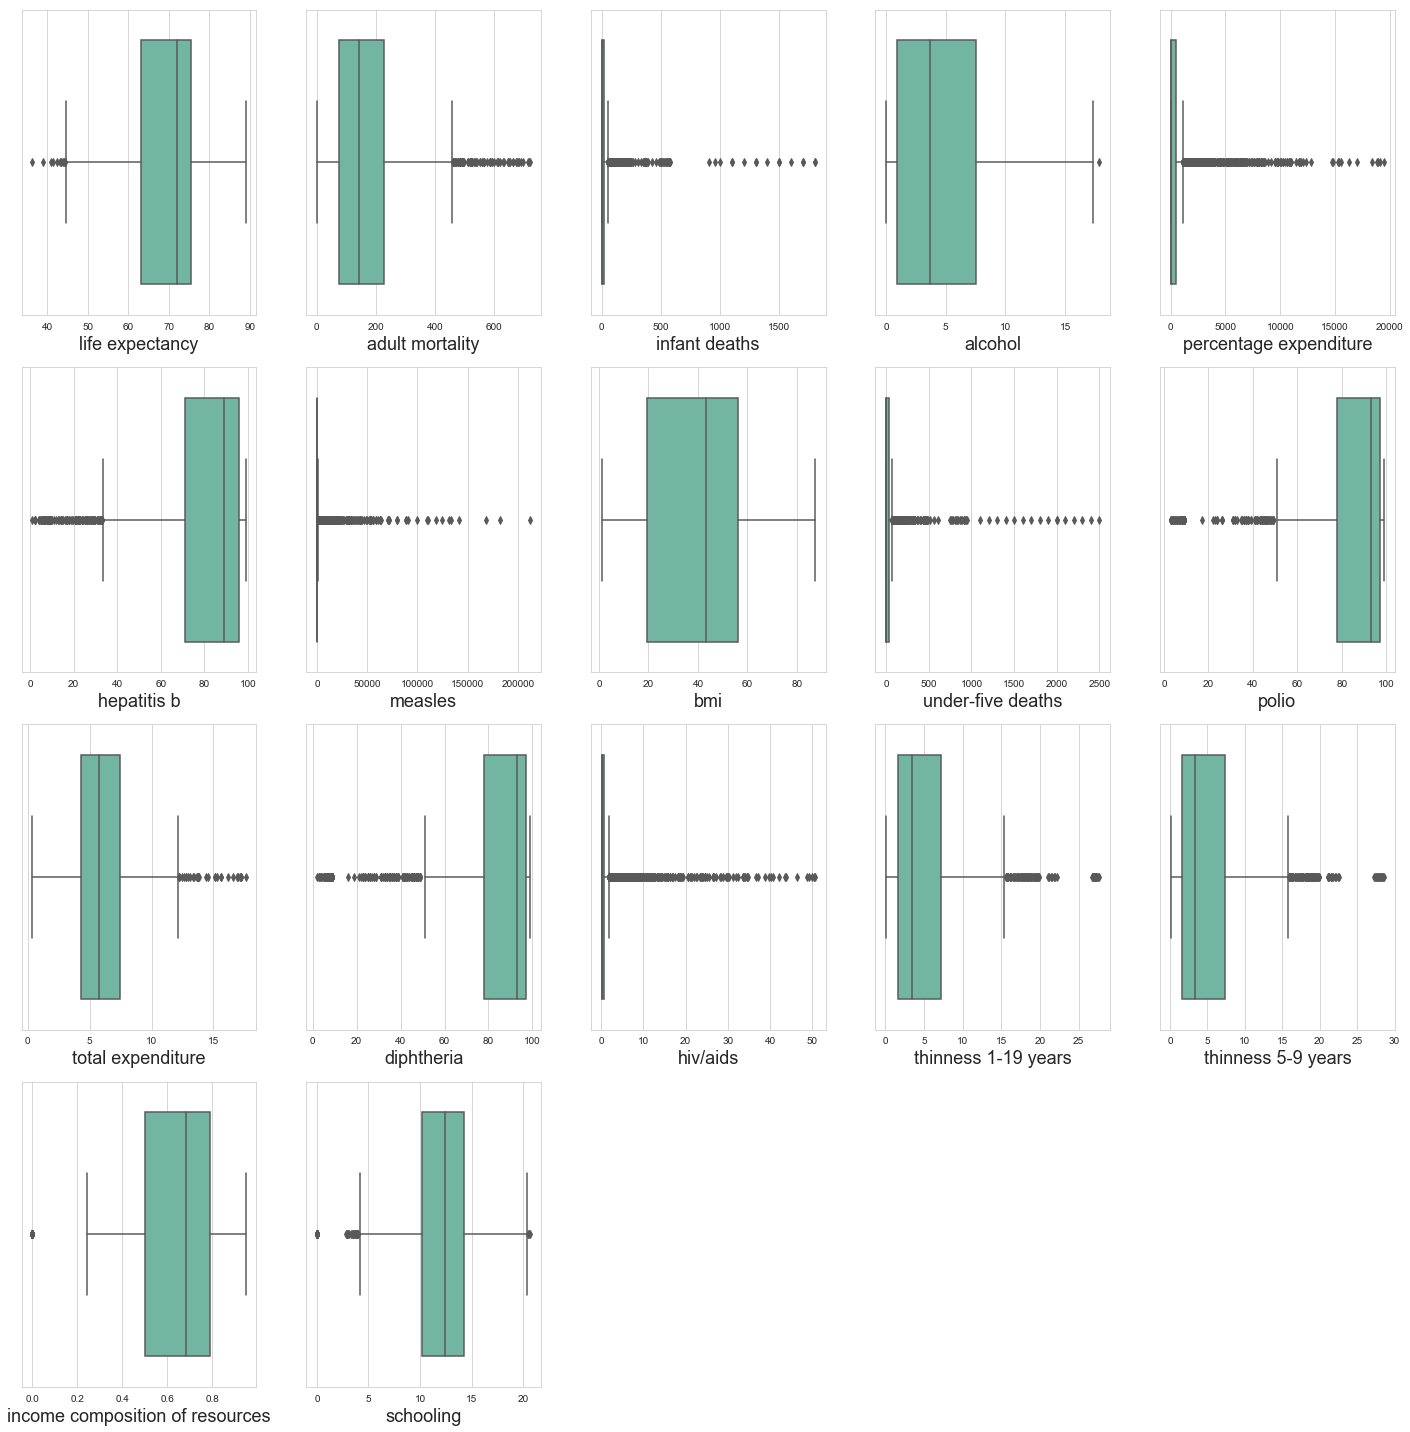

In [13]:
%matplotlib inline

fig = plt.figure(figsize=(20,20))

to_graph = ['life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']

for i, column in enumerate(to_graph):
    plt.subplot(4, 5, i+1)
    sns.boxplot(df4[column], palette='Set2')
    plt.xlabel('{}'.format(column), fontsize=18)

plt.tight_layout()
plt.show()

In [14]:
# numpy percentile() method returns the values of the given percentiles.
# choose 75 and 25 as parameters which corresponds to the 3rd and 1st quartiles

columns = ['life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']

for column in columns:
    q75, q25 = np.percentile(df4[column], [75,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print('In {}, there are {} high outliers and {} low outliers'.format(column,
          len(np.where(df4[column] > max_val)[0]), len(np.where(df4[column] < min_val)[0])))
    print('------------------------------------------------------------------------------------')

In life expectancy, there are 0 high outliers and 12 low outliers
------------------------------------------------------------------------------------
In adult mortality, there are 82 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In infant deaths, there are 315 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In alcohol, there are 1 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In percentage expenditure, there are 389 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In hepatitis b, there are 0 high outliers and 248 low outliers
------------------------------------------------------------------------------------
In measles, there are 542 high outliers and 0 low outliers
----------------------------------------

The resulting boxes are quite compressed and there seem to be a lot of outliers in the variables.

To handle these outliers, we will limit their values using either one- or two-way **winsorization** depending on the variables. 

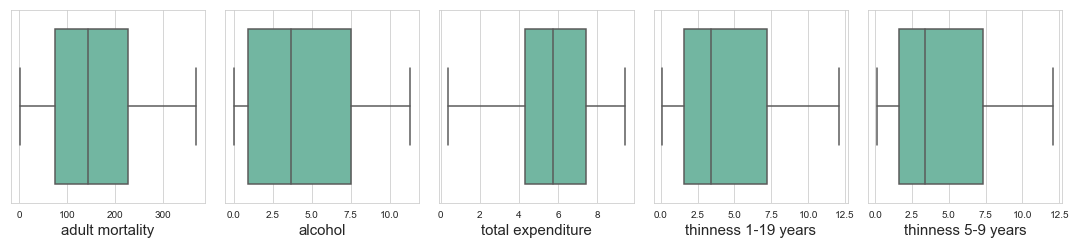

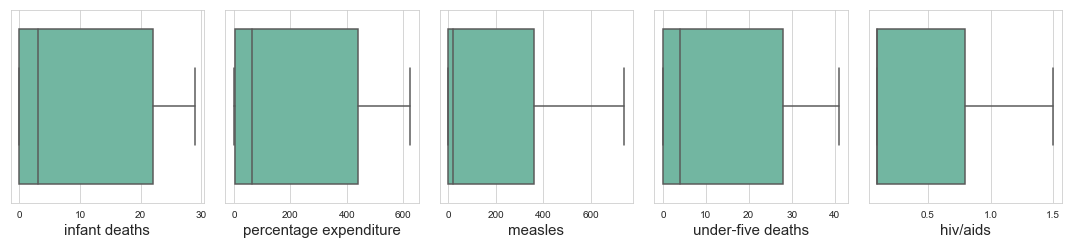

In [15]:
high_ol1 = ['adult mortality', 'alcohol', 'total expenditure', 
            'thinness 1-19 years', 'thinness 5-9 years']

high_ol2 = ['infant deaths', 'percentage expenditure',
       'measles', 'under-five deaths', 'hiv/aids']

plt.figure(figsize=(15,3.5))

for i, column in enumerate(high_ol1):
    plt.subplot(1,5,i+1)
    df4[column] = winsorize(df4[column], (0,0.07))
    sns.boxplot(df4[column], palette='Set2')
    plt.xlabel('{}'.format(column), fontsize=15)
plt.tight_layout()
plt.show()

plt.figure(figsize=(15,3.5))

for i, column in enumerate(high_ol2):
    plt.subplot(1,5,i+1)
    df4[column] = winsorize(df4[column], (0,0.20))
    sns.boxplot(df4[column], palette='Set2')
    plt.xlabel('{}'.format(column), fontsize=15)

plt.tight_layout()
plt.show()

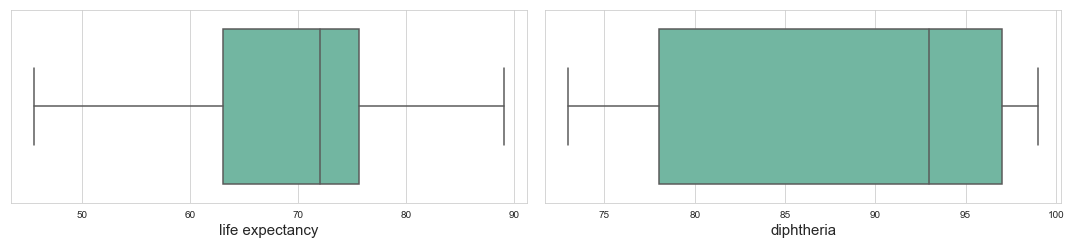

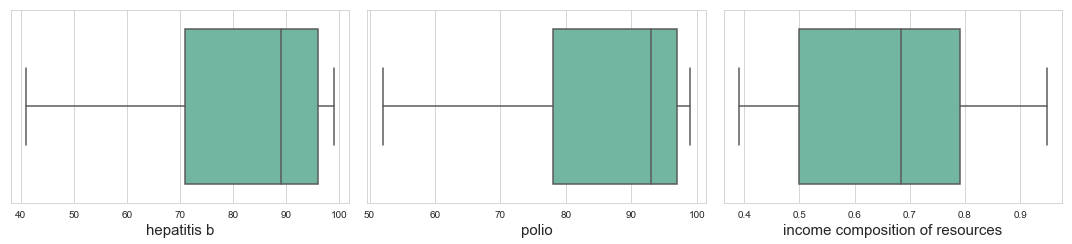

In [16]:
low_ol1 = ['life expectancy', 'diphtheria']

df4['life expectancy'] = winsorize(df4['life expectancy'], (0.01,0))
df4['diphtheria'] = winsorize(df4['diphtheria'], (0.2,0))

plt.figure(figsize=(15,3.5))
plt.subplot(1,2,1)
sns.boxplot(df4['life expectancy'], palette='Set2')
plt.xlabel('life expectancy', fontsize=15)

plt.subplot(1,2,2)
sns.boxplot(df4['diphtheria'], palette='Set2')
plt.xlabel('diphtheria', fontsize=15)

plt.tight_layout()
plt.show()


low_ol2 = ['hepatitis b', 'polio', 'income composition of resources']

plt.figure(figsize=(15,3.5))
for i, column in enumerate(low_ol2):
    plt.subplot(1,3,i+1)
    df4[column] = winsorize(df4[column], (0.1,0))
    sns.boxplot(df4[column], palette='Set2')
    plt.xlabel('{}'.format(column), fontsize=15)
plt.tight_layout()
plt.show()

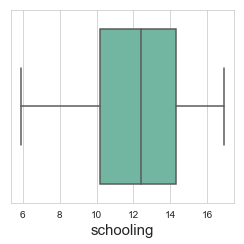

In [17]:
both_ol = ['schooling']

plt.figure(figsize=(3.5,3.5))

for i, column in enumerate(both_ol):
    plt.subplot(1,1,i+1)
    df4[column] = winsorize(df4[column], (0.05,0.05))
    sns.boxplot(df4[column], palette='Set2')
    plt.xlabel('{}'.format(column), fontsize=15)

plt.tight_layout()
plt.show()

In [18]:
columns = ['life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years',
       'thinness 5-9 years', 'income composition of resources', 'schooling']

for column in columns:
    q75, q25 = np.percentile(df4[column], [75,25])
    iqr = q75 - q25
    min_val = q25 - iqr*1.5
    max_val = q75 + iqr*1.5
    print('In {} post winsorization, there are {} high outliers and {} low outliers'.format(column,
          len(np.where(df4[column] > max_val)[0]), len(np.where(df4[column] < min_val)[0])))
    print('------------------------------------------------------------------------------------')

In life expectancy post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In adult mortality post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In infant deaths post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In alcohol post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In percentage expenditure post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------------
In hepatitis b post winsorization, there are 0 high outliers and 0 low outliers
------------------------------------------------------------------------------

As we can see, the box plots and Turkey's method reveal no outliers after winsorization of our variables.

## Explore the data using univariate and multivariate exploration techniques. You should pay special attention to your target variable. In this regard, your focus should be on finding the relevant variables that may affect life expectancy.

In [19]:
# get univariate statistics for string based variables
df4.describe()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
count,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.00000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000,2938.000000
mean,2007.518720,69.231892,157.889210,9.704561,4.460322,208.548822,80.946645,203.118108,38.29869,13.277740,85.470169,5.821239,88.367289,0.469197,4.578787,4.587095,0.654642,12.114315
std,4.613841,9.464636,106.567314,11.660321,3.813663,247.725938,19.371200,296.980200,19.99140,16.412181,15.332736,2.163340,9.819534,0.569172,3.577732,3.589714,0.163378,2.973775
min,2000.000000,45.600000,1.000000,0.000000,0.010000,0.000000,41.035714,0.000000,1.00000,0.000000,52.000000,0.370000,73.000000,0.100000,0.100000,0.100000,0.391000,5.900000
25%,2004.000000,63.100000,74.000000,0.000000,0.902500,4.685343,71.000000,0.000000,19.32500,0.000000,78.000000,4.312500,78.000000,0.100000,1.600000,1.600000,0.500000,10.200000
50%,2008.000000,72.000000,144.000000,3.000000,3.697500,64.912906,89.000000,17.000000,43.25000,4.000000,93.000000,5.760000,93.000000,0.100000,3.400000,3.400000,0.684000,12.400000
75%,2012.000000,75.600000,228.000000,22.000000,7.550000,441.534144,96.000000,360.250000,56.10000,28.000000,97.000000,7.440000,97.000000,0.800000,7.200000,7.300000,0.791107,14.300000
max,2015.000000,89.000000,369.000000,29.000000,11.340000,623.910050,99.000000,741.000000,87.30000,41.000000,99.000000,9.420000,99.000000,1.500000,12.100000,12.100000,0.948000,16.900000


In [20]:
# descriptive statistics for text-based variables
df4.describe(include=['O'])

,country,status
count,2938,2938
unique,193,2
top,Lesotho,Developing
freq,16,2426


In [21]:
df4.columns

Index(['country', 'year', 'status', 'life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling'],
      dtype='object')

#### Univariate visualization of continuous variables

<Figure size 1296x1080 with 0 Axes>

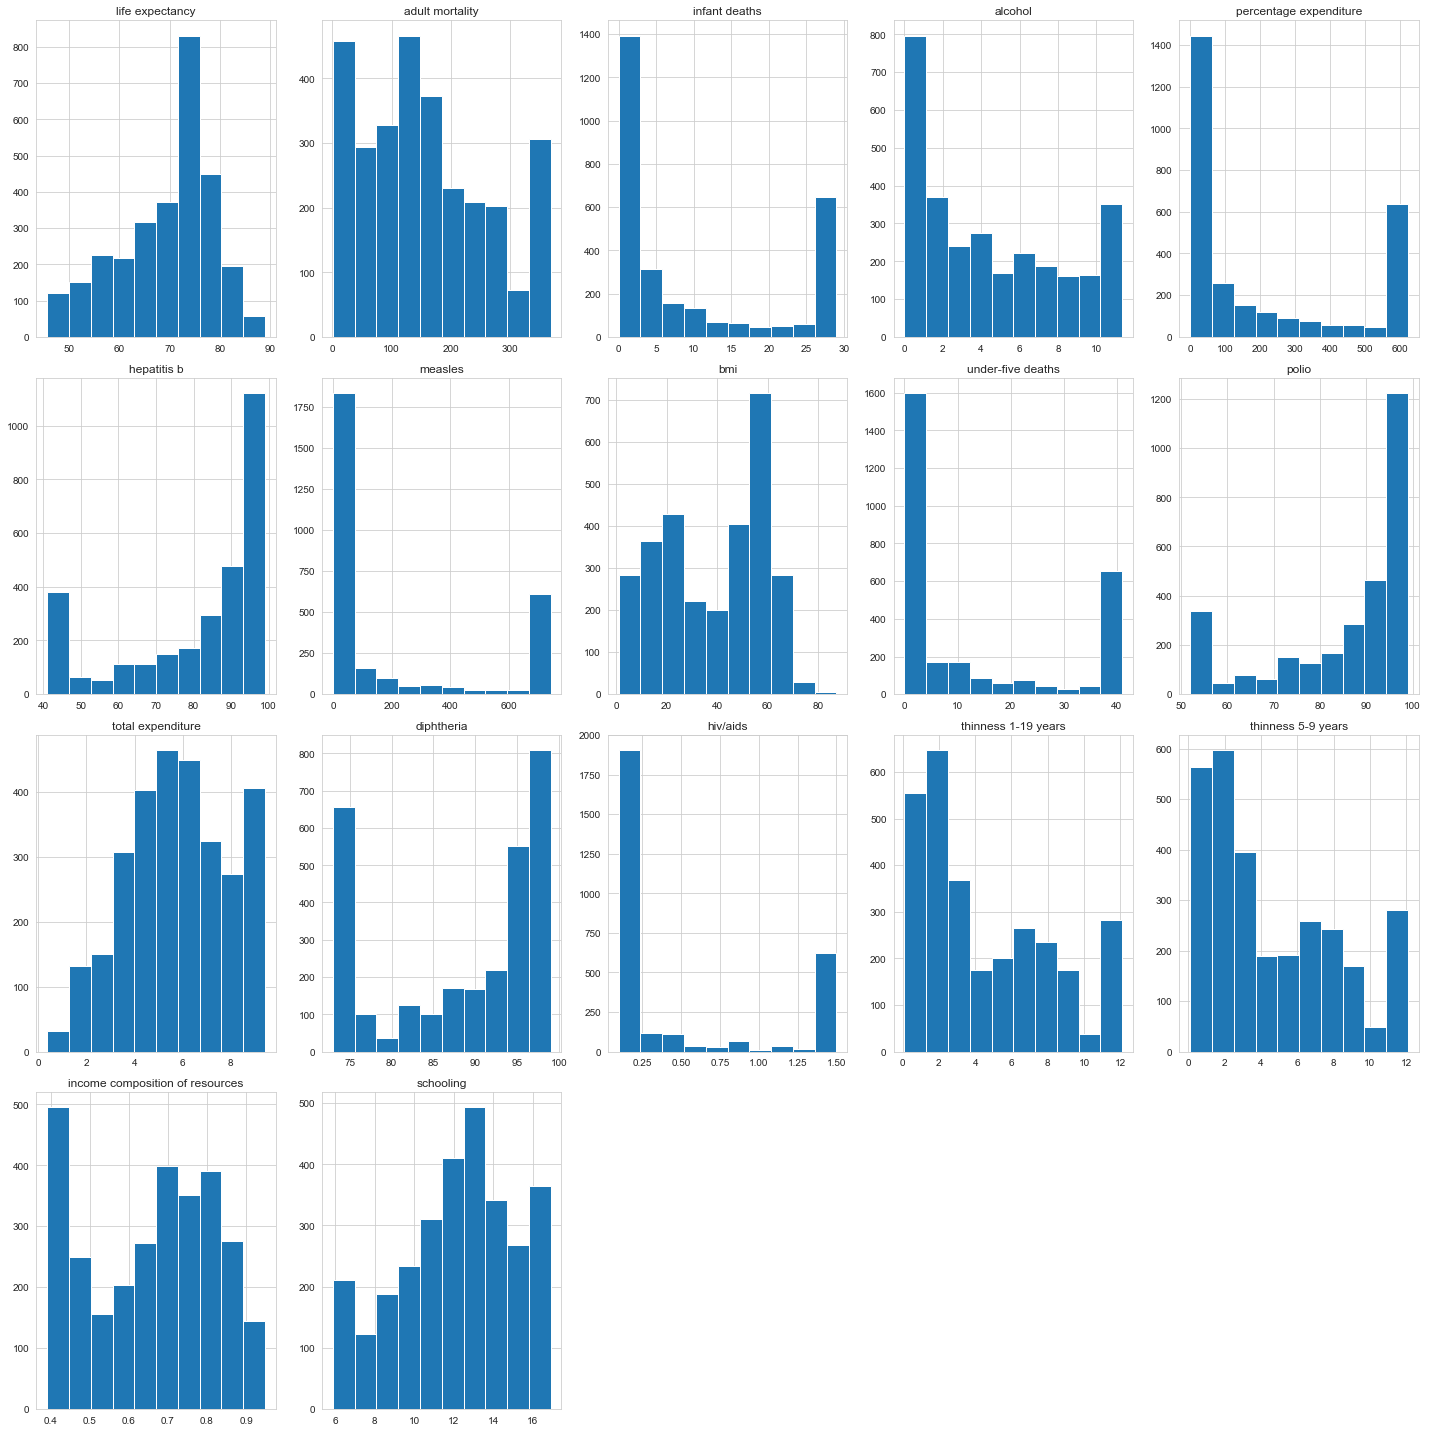

In [22]:
# histograms of continuous variable's distribution
plt.figure(figsize=(18,15))

columns = ['life expectancy', 'adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling']

plt.figure(figsize=(20,20))

for i in range(len(columns)):
    plt.subplot(4,5,i+1)
    plt.hist(df4[columns[i]])
    plt.title(columns[i])
    
plt.tight_layout()    
plt.show()

#### Univariate visualization of categorical variables

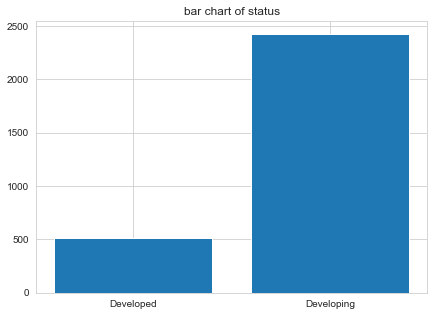

In [23]:
# bar chart of status
plt.figure(figsize=(7,5))
plt.bar(df4.groupby('status')['status'].count().index, df4.groupby('status')['status'].count())
plt.title('bar chart of status')
plt.show()

As the bar chart demonstrates, observation counts for developing countries are 4.5 times higher than those of developed ones. Knowing this imbalance is important especially in classification model. 

#### Bivariate analysis of continuous variables

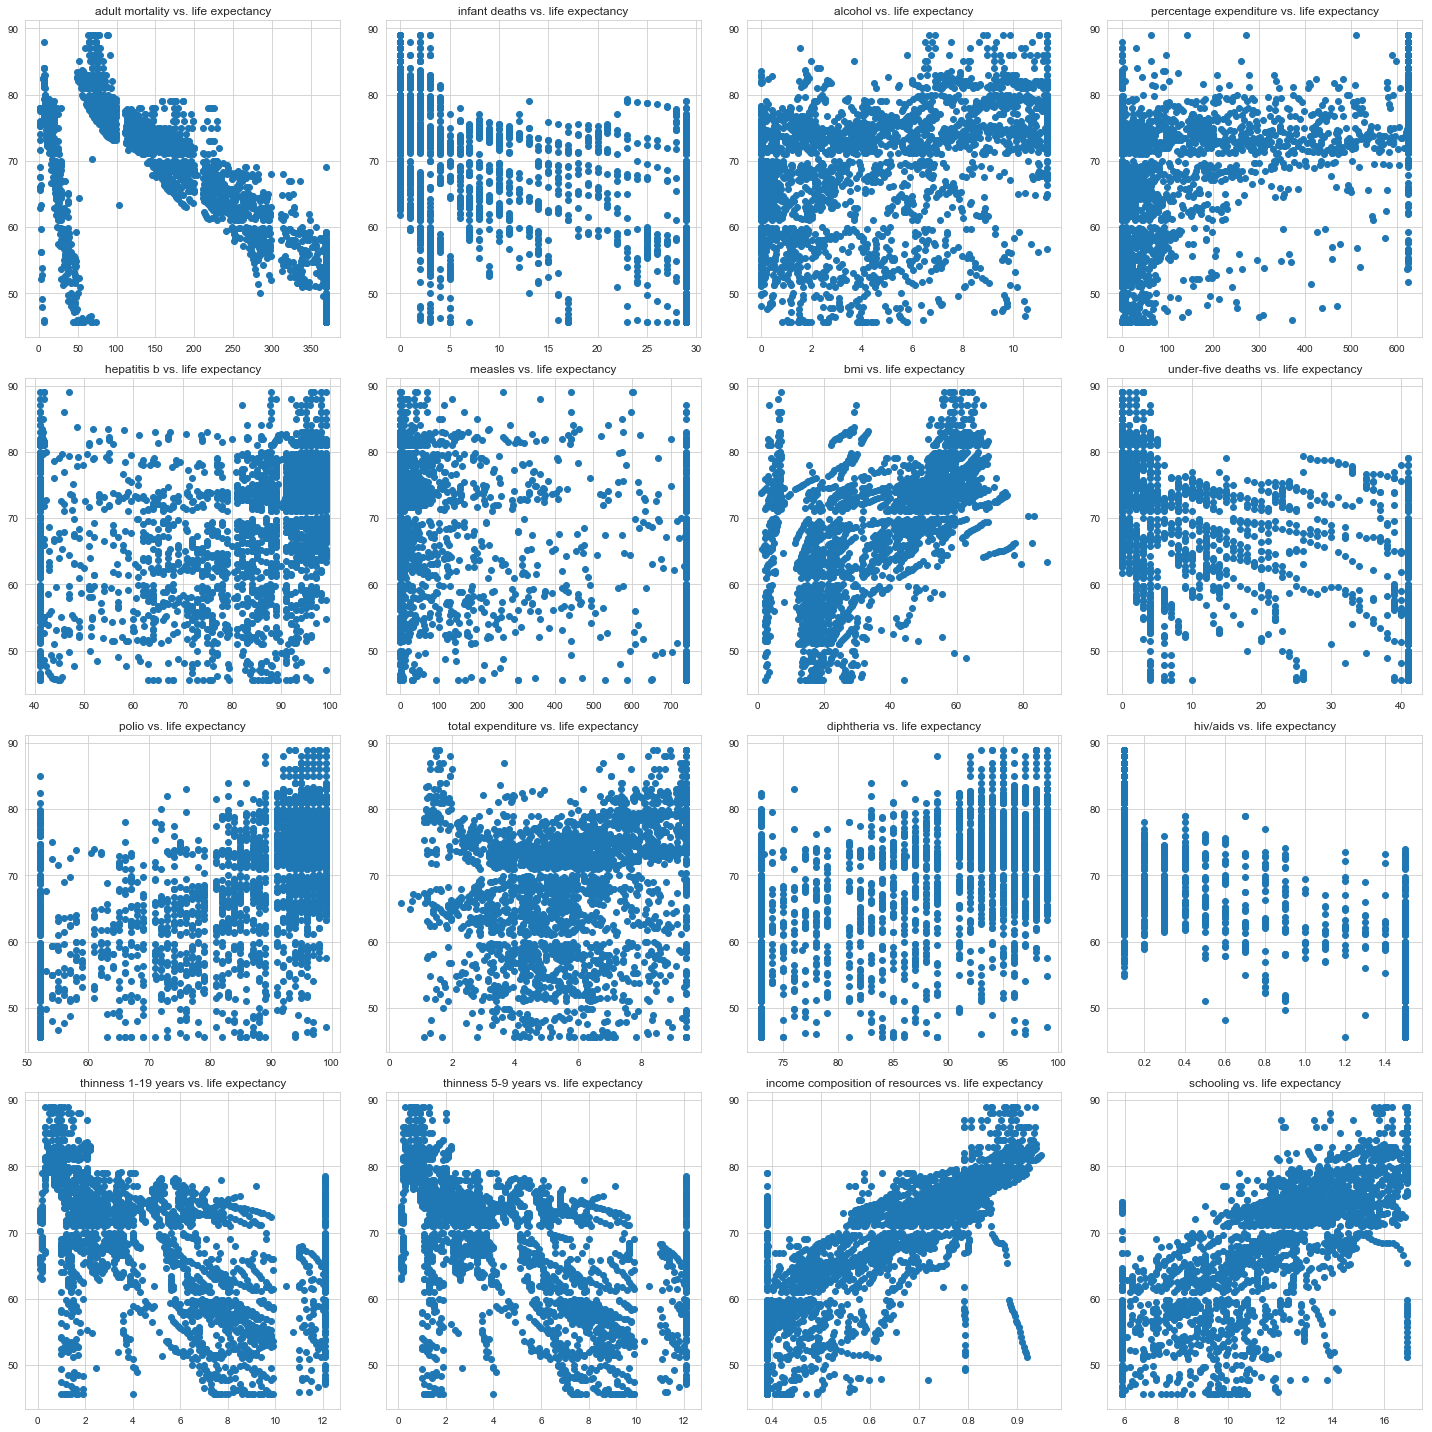

In [24]:
# scatterplot for continuous variables

columns = ['adult mortality',
       'infant deaths', 'alcohol', 'percentage expenditure', 'hepatitis b',
       'measles', 'bmi', 'under-five deaths', 'polio', 'total expenditure',
       'diphtheria', 'hiv/aids', 'thinness 1-19 years', 'thinness 5-9 years',
       'income composition of resources', 'schooling']

plt.figure(figsize=(20,20))

for i in range(len(columns)):
    plt.subplot(4,4,i+1)
    plt.scatter(df4[columns[i]], df4['life expectancy'])
    plt.title('{} vs. life expectancy'.format(columns[i]))
    
plt.tight_layout()    
plt.show()

Observation:

 * `life expectancy` has somewhat a negative relationship with `adult mortality` 
 
 * `life expectancy` has a positive relationships with `income composition of resources` and `schooling`


Let's take a look at another informative statistic that measures the comovements of two continuous variables while adding a layer of precision and ease of interpretation across items- the **correlation coefficient**.

In [25]:
# get correlation matrix
df4.corr()

,year,life expectancy,adult mortality,infant deaths,alcohol,percentage expenditure,hepatitis b,measles,bmi,under-five deaths,polio,total expenditure,diphtheria,hiv/aids,thinness 1-19 years,thinness 5-9 years,income composition of resources,schooling
year,1.000000,0.167629,-0.055878,-0.046439,-0.061394,0.029166,0.173897,-0.115141,0.100417,-0.047632,0.118496,0.067103,0.139219,-0.084387,-0.040950,-0.039830,0.172493,0.178810
life expectancy,0.167629,1.000000,-0.673273,-0.594137,0.404845,0.482316,0.291241,-0.337020,0.557811,-0.617557,0.570039,0.224647,0.598294,-0.795620,-0.561347,-0.562485,0.802663,0.737928
adult mortality,-0.055878,-0.673273,1.000000,0.401980,-0.215132,-0.325954,-0.197312,0.212709,-0.398291,0.419131,-0.360762,-0.148740,-0.388239,0.584883,0.385818,0.396672,-0.539840,-0.475674
infant deaths,-0.046439,-0.594137,0.401980,1.000000,-0.368697,-0.403058,-0.256373,0.564430,-0.455002,0.996064,-0.427620,-0.160536,-0.460505,0.443917,0.476474,0.489265,-0.529875,-0.543416
alcohol,-0.061394,0.404845,-0.215132,-0.368697,1.000000,0.362371,0.105712,-0.197842,0.319627,-0.367019,0.273124,0.312537,0.318191,-0.205999,-0.455183,-0.446848,0.525381,0.535663
percentage expenditure,0.029166,0.482316,-0.325954,-0.403058,0.362371,1.000000,0.113570,-0.211496,0.334613,-0.403956,0.275961,0.176074,0.309693,-0.305219,-0.343450,-0.346350,0.513917,0.499735
hepatitis b,0.173897,0.291241,-0.197312,-0.256373,0.105712,0.113570,1.000000,-0.232466,0.200854,-0.266164,0.560085,0.119719,0.609176,-0.279820,-0.151725,-0.161897,0.269869,0.269973
measles,-0.115141,-0.337020,0.212709,0.564430,-0.197842,-0.211496,-0.232466,1.000000,-0.318103,0.563930,-0.315634,-0.165897,-0.322899,0.230424,0.363086,0.366953,-0.266229,-0.317994
bmi,0.100417,0.557811,-0.398291,-0.455002,0.319627,0.334613,0.200854,-0.318103,1.000000,-0.472112,0.341747,0.228374,0.353192,-0.486896,-0.569432,-0.579025,0.544796,0.524938
under-five deaths,-0.047632,-0.617557,0.419131,0.996064,-0.367019,-0.403956,-0.266164,0.563930,-0.472112,1.000000,-0.443217,-0.164541,-0.477749,0.472118,0.486136,0.498842,-0.548234,-0.560396


Let's rendering the matrix as a heatmap:

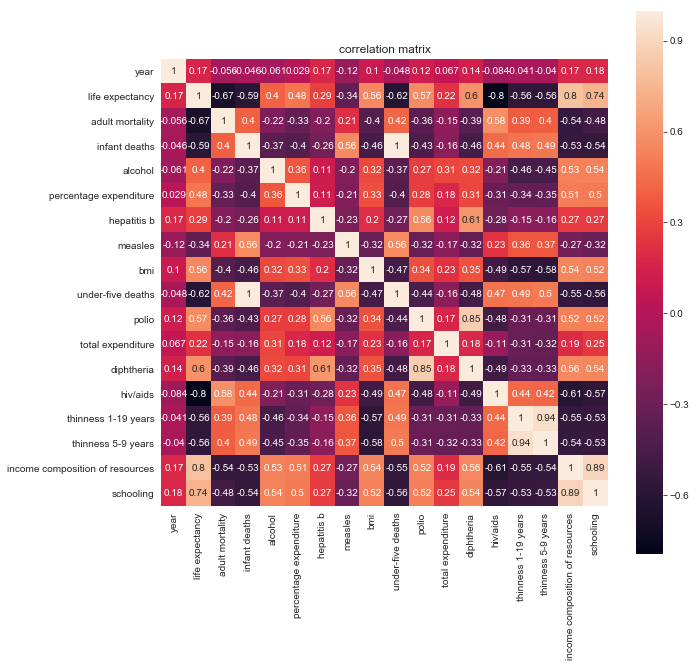

In [26]:
cormat = df4.corr()
plt.figure(figsize=(10,10))
sns.heatmap(cormat, square=True, annot=True)
plt.title('correlation matrix')
plt.show()

There are a few important points (noted that I am only interested in correlation > 0.65 or <-0.65):

 * `income composition of resources` and `schooling` are highly and positively correlated.
 
 * `polio` and `diphtheria` are highly and positively correlated.
 
 * `under-five deaths` and `infant deaths` have a perfect positive relationship.
 
 * `thinnes 1-19 years` and `thinness 5-9 years` have an almost perfect relationship.
 
 * `life expectancy` have a highly positive relationship with `schooling` and `income composition`, and a highly negative relationship with `hiv/aids` and `adult mortality`.
 


#### Bivariate analysis of a continuous - categorical pair

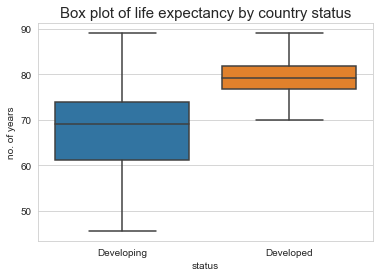

In [27]:
# boxplot for life expectancy comparisons by country's status
sns.boxplot(x='status', y='life expectancy', data=df4)
plt.title('Box plot of life expectancy by country status', fontsize=15)
plt.ylabel('no. of years')
plt.show()

## In the feature engineering step, you need to select a suite of variables that you think would be ideal in the modeling phase. More concretely, you may discard some variables that are very correlated with the other ones or the variables that you think irrelevant with the life expectancy.

In [28]:
df4.groupby('status')['life expectancy'].mean()

status
Developed     79.197852
Developing    67.128607
Name: life expectancy, dtype: float64

It looks like on average, life expectancy in developed countries is higher than that of developing countries. There is less variation in life expectancy in developed countries also.

#### Let's use a proper statistical test, such as t-test, to learn whether the difference is statistically significant:

In [29]:
import scipy.stats as stats
# testing whether the difference is significant
print('t-test between the developing vs. developed groups')
stats.ttest_ind(df4.loc[df4['status']=='Developed', 'life expectancy'], df4.loc[df4['status']=='Developing', 'life expectancy'])

t-test between the developing vs. developed groups


Ttest_indResult(statistic=29.95462938660176, pvalue=2.9323745212760544e-172)

p-value indicates the difference is significant. 

Let's observe if there are correlations among the variables that are highly correlated to the target variable, `life expectancy`, according to the heatmap. And those tentative feature variables are: `income`, `schooling`, `adult mortality`, and `hiv/aid`.

Although `infant deaths`, `under-five deaths`, `thinness 1-19 years`, `thinness 5-9 years` also seem to correlate with our target variable; however, they are irrelevant when it comes to determine `life expectancy` so they will be discarded, along with the rest.

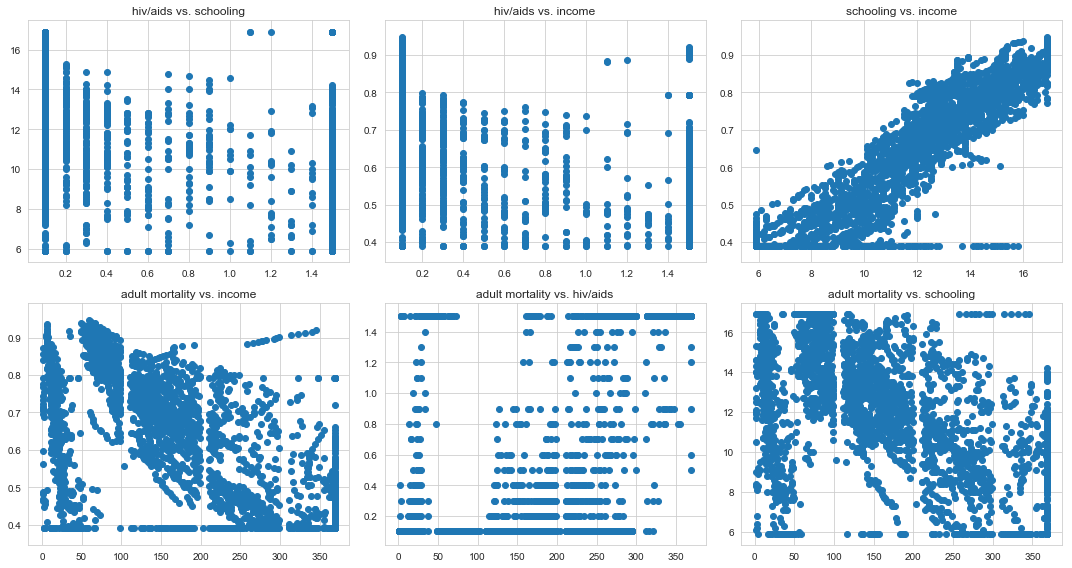

In [30]:
plt.figure(figsize=(15,8))

plt.subplot(231)
plt.scatter(df4['hiv/aids'], df4['schooling'])
plt.title('hiv/aids vs. schooling')

plt.subplot(232)
plt.scatter(df4['hiv/aids'], df4['income composition of resources'])
plt.title('hiv/aids vs. income')

plt.subplot(233)
plt.scatter(df4['schooling'], df4['income composition of resources'])
plt.title('schooling vs. income')

plt.subplot(234)
plt.scatter(df4['adult mortality'], df4['income composition of resources'])
plt.title('adult mortality vs. income')

plt.subplot(235)
plt.scatter(df4['adult mortality'], df4['hiv/aids'])
plt.title('adult mortality vs. hiv/aids')

plt.subplot(236)
plt.scatter(df4['adult mortality'], df4['schooling'])
plt.title('adult mortality vs. schooling')

plt.tight_layout()
plt.show()

It looks like `schooling` and `income composition of resources` have the clearest inter-relationship

In [31]:
# looking at correlations
print('The correlation coefficient of schooling and income is:')
df4['schooling'].corr(df4['income composition of resources'])

The correlation coefficient of schooling and income is:


0.8946549043295551

For feature engineering step, I will create a new data frame with feature columns correlated to `life expectancy`. According to the heatmap and barplot, the tentative feature columns are:

 * `status`

 * `schooling`
 
 * `income composition of resources`
 
 * `adult mortality`
 
 * `hiv/aids`

However, `schooling` and `income composition of resources` are highly correlated, one of them will be dropped since the features should NOT be inter-related.

To choose between one of them, we will look at their correlations with our target variable `life expectancy`:

In [34]:
print('The correlation coefficient of schooling and adult mortality is: {}'.format(df4['schooling'].corr(df4['life expectancy'])))
print('\n')
print('The correlation coefficient of income and adult mortality is: {}'.format(df4['life expectancy'].corr(df4['income composition of resources'])))

The correlation coefficient of schooling and adult mortality is: 0.7379280084669535


The correlation coefficient of income and adult mortality is: 0.8026632349111347


We will eliminate `schooling` as it has lower correlation with our target variable.

#### As a result, the new data frame with chosen feature variables along with our target variable will contain:

 * `status`
 
 * `income composition of resources`

 * `adult mortality`
 
 * `hiv/aids`
 
 * `life expectancy`


In [35]:
# creating a new feature engineering dataframe
engineer_df = df4[['life expectancy', 'status', 'income composition of resources', 'adult mortality', 'hiv/aids']]

# one-hot encoding to convert categorical value to numerical value
engineer_df = pd.concat([engineer_df, pd.get_dummies(engineer_df['status'],drop_first=True)],axis=1)

# dropping the status column after one-hot encoding
engineer_df = engineer_df.drop('status', axis=1)
engineer_df.head()

,life expectancy,income composition of resources,adult mortality,hiv/aids,Developing
0,65.0,0.479,263.0,0.1,1
1,59.9,0.476,271.0,0.1,1
2,59.9,0.470,268.0,0.1,1
3,59.5,0.463,272.0,0.1,1
4,59.2,0.454,275.0,0.1,1


## Summarize findings. 

 * The data set itself has many problems- incorrectly recorded values, lots of missing values, etc.
 
 * Missing values are either dropped or imputed using interpolation (since it is a time series data).

 * Outliers are handled using winsorization.
 
 * Heatmap and correlation matrix help us to identify a few features, such as status `schooling`, `income composition of resources`, `adult mortality`, `hiv/aids` that help towards predicting our target variable `life expectancy`.
 
 * However, feature targets shouldn't be inter-related, and a series of statistical tests help to eliminate `schooling` from our tentative feature variables list.
 
 * Boxplot and t-test also indicates that `status` has a signifcant effect on our target variable (a.k.a developed countries have higher life expectancy on average compared to devoping countries).

 * For future engineer steps, we will transform our variables using techniques such as Box-Cox, log, or square root, etc. since many machine learning models assume the target variables normally distributed.
 
 * We will also rescale or standardize our variables so that their values fall in the same range for machine learning models to work.
